In [1]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
import numpy as np
import matplotlib.pyplot as plt


In [2]:
original_path = "data/snli/train.csv" 
transformed_path = "data/snli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)
df_t = pd.read_csv(transformed_path)

198
87.4% +/- 9.6%


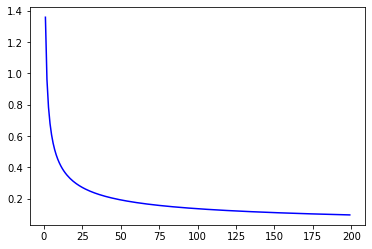

In [3]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,200))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print(n)
print("{:.1%} +/- {:.1%}".format(p, e_id))

In [ ]:
samples = 1000
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
174924,a man in a suit is sitting and talking into a microphone,a man is talking into a microphone,entailment



modified



,premise,hypothesis,label
174924,a adult male in a suit of clothes is sitting and talking into a mike,a adult male is talking into a mike,entailment



decide



 y



original



,premise,hypothesis,label
293023,two young girls walk together down a street in front of a gas station,two people walk down the street,entailment



modified



,premise,hypothesis,label
293023,two young girls walk together down a street in front of a gaseous state station,two people walk down the street,entailment



decide



 y



original



,premise,hypothesis,label
464256,a woman in a green day shirt on a boat hooks something with a fishing pole,a woman in a green day shirt on a boat hooks something with a fishing pole and tries to drag it out of the water,neutral



modified



,premise,hypothesis,label
464256,a adult female in a green solar day shirt on a boat meat hooks something with a fishing pole,a adult female in a green solar day shirt on a boat meat hooks something with a fishing pole and attempt to retarding force it out of the water,neutral



decide



 y



original



,premise,hypothesis,label
76936,a young boy makes a mess on his face with his chocolate ice cream cone,a young boy misses his mouth and pushes the ice cream towards his eye,neutral



modified



,premise,hypothesis,label
76936,a young male child makes a muss on his human face with his cocoa water ice pick cone,a young male child girl his rima oris and pushes the water ice pick towards his optic,neutral



decide



 y



original



,premise,hypothesis,label
522538,a man in a hat and glasses looks through a telescope,a man in a hat and glasses looks through a telescope during the night while the stars are out,neutral



modified



,premise,hypothesis,label
522538,a adult male in a hat and eyeglasses looks through a scope,a adult male in a hat and eyeglasses looks through a scope during the dark while the stars are out,neutral



decide



 y



original



,premise,hypothesis,label
5385,an older man in a nice dress shirt with a tie over his shoulder walking across a street in downtown,a man is sitting in a cafe down town,contradiction



modified



,premise,hypothesis,label
5385,an older adult male in a nice frock shirt with a necktie over his shoulder walking across a street in business district,a adult male is sitting in a coffeehouse down town,contradiction



decide



 y



original



,premise,hypothesis,label
495960,an elderly gentlemen looking at naked male statue,the man is a sculptor,neutral



modified



,premise,hypothesis,label
495960,an elderly gentleman looking at naked male statue,the adult male is a carver,neutral



decide



 y



original



,premise,hypothesis,label
547346,a boy wearing a gray shirt and black pants is bowling with a black bowling ball with only two pins left to knock down,the boy is in a bowling league,neutral



modified



,premise,hypothesis,label
547346,a male child wearing a grey shirt and black drawers is bowling with a black bowling ball with only two pins left to knock down,the male child is in a bowling conference,neutral



decide



 y



original



,premise,hypothesis,label
250261,a woman in a cowboy hat walks followed by a man in a blue baseball cap a boy in a blue tshort and a woman in a green top,a woman is followed by a man,entailment



modified



,premise,hypothesis,label
250261,a adult female in a puncher hat walks followed by a adult male in a blue baseball game cap a male child in a blue tshort and a adult female in a green top,a adult female is followed by a adult male,entailment



decide



 y



original



,premise,hypothesis,label
356511,people pass each other on a busy city street while talking on their cellphones,it is noisy,entailment



modified



,premise,hypothesis,label
356511,people walk each other on a busy metropolis street while talking on their cellphones,it is noisy,entailment



decide



 y



original



,premise,hypothesis,label
490429,a boy is standing next to a car in front of a clothesline,the vehicle is red,neutral



modified



,premise,hypothesis,label
490429,a male child is standing next to a machine in front of a clothesline,the vehicle is red,neutral



decide



 y



original



,premise,hypothesis,label
490929,a graveyard worker is digging or filling a grave another person is on his cellphone leaning on a tombstone,a man works at upsetting his woman,contradiction



modified



,premise,hypothesis,label
490929,a cemetery worker is digging or filling a grave another individual is on his cellphone leaning on a gravestone,a adult male plant at upsetting his adult female,contradiction



decide



 y



original



,premise,hypothesis,label
176375,a girl in a polka dotted blue jean dress walks barefoot on a balance beam,the girl is barefoot,entailment



modified



,premise,hypothesis,label
176375,a girl in a polka dotted blue denim frock walks shoeless on a balance radio beam,the girl is shoeless,entailment



decide



 y



original



,premise,hypothesis,label
144295,the class is taking a very important test,some of the class have their hands raised and are shouting out,contradiction



modified



,premise,hypothesis,label
144295,the class is taking a very important trial,some of the class have their hands raised and are shouting out,contradiction



decide



 n



original



,premise,hypothesis,label
47071,people enter a large building,the crowd is inside an airplane,contradiction



modified



,premise,hypothesis,label
47071,people get in a large building,the crowd is inside an plane,contradiction



decide



 y



original



,premise,hypothesis,label
536712,an older woman in a dark blue suit is standing next to a bookcase with a plethora of file folders making some kind of hand gesture,a woman is standing next to a bookcase,entailment



modified



,premise,hypothesis,label
536712,an older adult female in a dark blue suit of clothes is standing next to a bookcase with a embarrassment of data file brochure making some sort of hand gesture,a adult female is standing next to a bookcase,entailment



decide



 n



original



,premise,hypothesis,label
383081,a tour group wearing rain jackets and holding umbrellas are outside a barbed wire fence,the tourists are looking at a national monument,neutral



modified



,premise,hypothesis,label
383081,a circuit group wearing rainfall jackets and holding umbrellas are outside a barbed wire fence,the tourists are looking at a national memorial,neutral



decide



## CI

In [ ]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(count))
print("len(good) = {}\n".format(len(good)))
print("good pct = {:.3f}\n".format(g))


In [ ]:
all_ns = [38, 23, 15, 19, 17, 10, 13, 12, 11]
all_good = [27, 21, 12, 17, 13, 8, 11, 10, 9]
n = np.sum(all_ns)
pct = np.sum(all_good)/ n

# n=200

l = pct - e95(n)
u = pct + e95(n) 

print("count = {}\n".format(n))
print("good pct = {:.3f}\n".format(pct))
print("good 95% pct CI = ({:.3f}, {:.3f})".format(l,u))

In [ ]:
e95(200)

## IDS

In [ ]:
e95(200)